In [3]:
import pandas as pd
import numpy as np

df=pd.read_csv("/content/adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.shape

(48842, 15)

In [5]:
# To check for the null values in the dataset
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [6]:
print(df.education.value_counts(),"\n")
print(df.income.value_counts(),"\n")
print(df.occupation.value_counts(),"\n")
print(df.age.value_counts(),"\n")
print(df.workclass.value_counts(),"\n")
print(df.relationship.value_counts(),"\n")
print(df.race.value_counts(),"\n")
print(df.gender.value_counts(),"\n")
print(df['native-country'].value_counts())

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64 

income
<=50K    37155
>50K     11687
Name: count, dtype: int64 

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64 

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86

In [7]:
# Removing the redundant categories from the required columns

df=df[df['workclass']!='Without-pay']
df=df[df['workclass']!='Never-worked']
df=df[df['occupation']!='Armed-Forces']
df=df[df['education']!= 'Preschool']
df=df[df['education']!='1st-4th']
df=df[df['education']!='5th-6th']


In [8]:
# Replacing '?' (missing values) in the dataset
df.workclass.replace({'?':'Others'},inplace=True)
df.occupation.replace({'?':'Others'},inplace=True)
df['native-country'].replace({'?':'Not Listed'},inplace=True)

/tmp/ipython-input-8-3443513468.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.workclass.replace({'?':'Others'},inplace=True)
/tmp/ipython-input-8-3443513468.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [9]:
# Removing the redundant column
df.drop(columns='educational-num',inplace=True)
df.drop(columns='relationship',inplace=True)
df.drop(columns='race',inplace=True)
df.drop(columns='fnlwgt',inplace=True)

In [10]:
df.shape

(47957, 11)

In [11]:
df['native-country']

,native-country
0,United-States
1,United-States
2,United-States
3,United-States
4,United-States
...,...
48837,United-States
48838,United-States
48839,United-States
48840,United-States


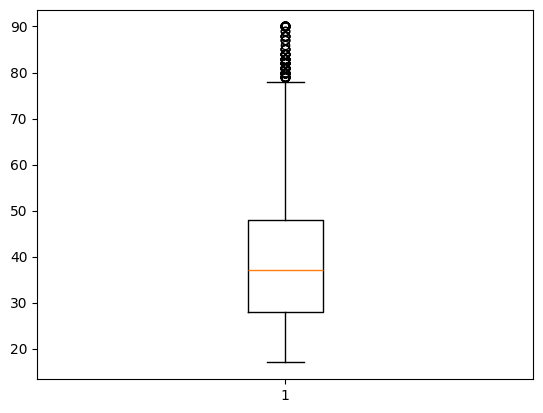

In [12]:
import matplotlib.pyplot as plt
plt.boxplot(df['age'])
plt.show()

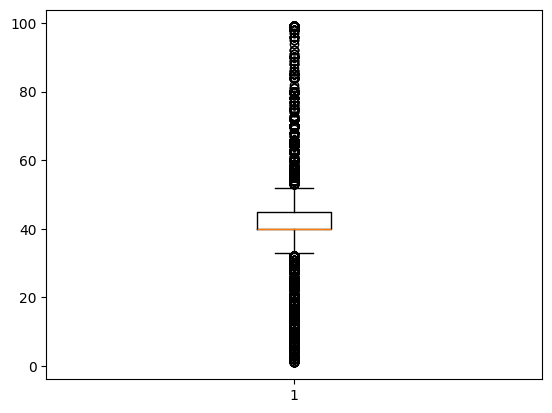

In [13]:
plt.boxplot(df['hours-per-week'])
plt.show()

In [14]:
# Outlier Removal

df=df[(df['age']<75 )& (df['age']>=17)]

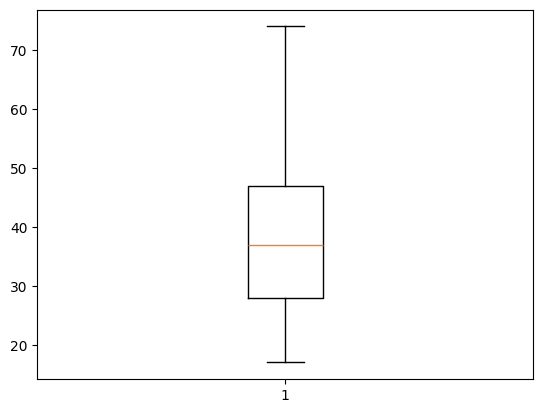

In [15]:
plt.boxplot(df['age'])
plt.show()


In [16]:
# Encoding the data

from sklearn.preprocessing import LabelEncoder
encoders = {}

for column in ['workclass','education','marital-status', 'occupation', 'gender', 'native-country']:
    encoder = LabelEncoder()
    #encoder.fit(df[column])
    df[column] = encoder.fit_transform(df[column])
    encoders[column] = encoder

In [17]:
# Splitting the data
x=df.drop(columns=['income'])
y=df['income']

In [18]:
df.head(15)

,age,workclass,education,marital-status,occupation,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,1,4,5,1,0,0,40,39,<=50K
1,38,3,9,2,3,1,0,0,50,39,<=50K
2,28,1,5,2,10,1,0,0,40,39,>50K
3,44,3,12,2,5,1,7688,0,40,39,>50K
4,18,2,12,4,7,0,0,0,30,39,<=50K
5,34,3,0,4,6,1,0,0,30,39,<=50K
6,29,2,9,4,7,1,0,0,40,39,<=50K
7,63,5,11,2,9,1,3103,0,32,39,>50K
8,24,3,12,4,6,0,0,0,40,39,<=50K
9,55,3,3,2,1,1,0,0,10,39,<=50K


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.14035088, 0.5       , 0.08333333, ..., 0.        , 0.39795918,
        0.95121951],
       [0.36842105, 0.5       , 0.75      , ..., 0.        , 0.5       ,
        0.95121951],
       [0.19298246, 0.16666667, 0.41666667, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.71929825, 0.5       , 0.75      , ..., 0.        , 0.39795918,
        0.95121951],
       [0.0877193 , 0.5       , 0.75      , ..., 0.        , 0.19387755,
        0.95121951],
       [0.61403509, 0.66666667, 0.75      , ..., 0.        , 0.39795918,
        0.95121951]])

In [20]:
df.isnull().sum()

,0
age,0
workclass,0
education,0
marital-status,0
occupation,0
gender,0
capital-gain,0
capital-loss,0
hours-per-week,0
native-country,0


In [21]:
# Splitting the data into training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [23]:
models={
    "KNN":KNeighborsClassifier(),
    "LogisticReg":LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP ": MLPClassifier(solver='adam',hidden_layer_sizes=(4,2),random_state=42,max_iter=2000),
    "NN" : keras.models.Sequential([Dense(128, input_shape=(xtrain.shape[1],), activation='relu'),
     Dropout(0.4),
     Dense(64, activation='relu'),
     Dense(32, activation='relu'),
     Dense(16, activation='relu'),
     Dropout(0.3),
     Dense(8, activation='relu'),
     Dropout(0.2),
     Dense(1, activation='sigmoid')]),
    "SVM": SVC(kernel='linear'),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(objective='binary:logistic', random_state=42)
}

results=[]

target_encoder=LabelEncoder()
ytrain_encoded=target_encoder.fit_transform(ytrain)
ytest_encoded=target_encoder.transform(ytest)

for name in models:
  if name=="NN":
    models[name].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = models[name].fit(xtrain, ytrain_encoded, epochs=150, batch_size=200, validation_split=0.2)
    test_loss, test_accuracy = models[name].evaluate(xtest, ytest_encoded)
    results.append(test_accuracy)
  else:
    if name=="XGBoost":
      models[name].fit(xtrain,ytrain_encoded)
    else:
      models[name].fit(xtrain,ytrain)
    predict=models[name].predict(xtest)
    print(name,':',predict)
    if name=="XGBoost":
      results.append(accuracy_score(ytest_encoded,predict))
    else:
      results.append(accuracy_score(ytest,predict))

print(results)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KNN : ['<=50K' '<=50K' '<=50K' ... '<=50K' '>50K' '<=50K']
LogisticReg : ['<=50K' '<=50K' '<=50K' ... '<=50K' '>50K' '<=50K']
RandomForest : ['<=50K' '<=50K' '<=50K' ... '<=50K' '>50K' '<=50K']
Naive Bayes : ['<=50K' '>50K' '<=50K' ... '<=50K' '>50K' '<=50K']
MLP  : ['<=50K' '>50K' '<=50K' ... '<=50K' '>50K' '<=50K']
Epoch 1/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6618 - loss: 0.6118 - val_accuracy: 0.7537 - val_loss: 0.4558
Epoch 2/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7578 - loss: 0.4802 - val_accuracy: 0.8100 - val_loss: 0.3952
Epoch 3/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7866 - loss: 0.4302 - val_accuracy: 0.8159 - val_loss: 0.3832
Epoch 4/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7939 - loss: 0.4182 - val_accuracy: 0.8220 - val_loss: 0.3703
Epoch 5/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8104 - loss: 0.4037 - val_accuracy: 0.8261 - val_loss: 0.3631
Epoch 6/150
153/153 ━━━━━━━━━━━━━━━━

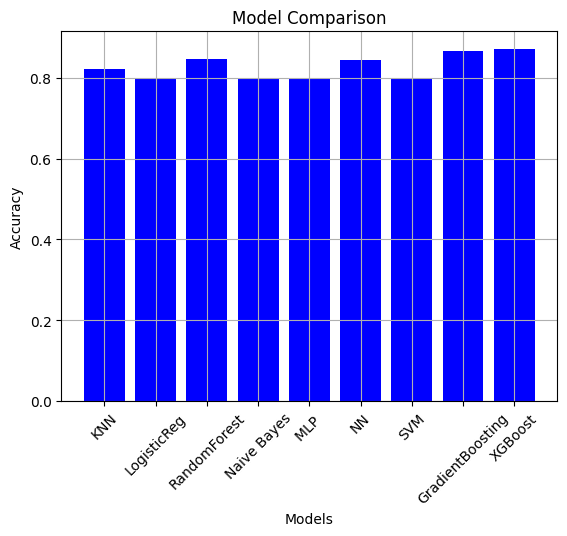

In [24]:
plt.bar(models.keys(),results,color='blue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.title("Model Comparison")
plt.grid(True)
plt.show()

In [37]:
from sklearn.metrics import classification_report
print("Classification Report for XGBoost Classifier\n")
print(classification_report(ytest_encoded,predict)) # in the end 'predict' stored the results for XGBoost

Classification Report for XGBoost Classifier

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7193
           1       0.77      0.67      0.72      2315

    accuracy                           0.87      9508
   macro avg       0.83      0.80      0.82      9508
weighted avg       0.87      0.87      0.87      9508



In [25]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 113.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.8 MB/s eta 0:00:00


In [26]:
import joblib
joblib.dump(encoders, "label_encoders.pkl")
joblib.dump(models["XGBoost"],"bestmodel.pkl")
joblib.dump(target_encoder, "target_encoder.pkl")
print("Saved the best model.")

Saved the best model.


In [27]:
target_encoder = joblib.load("target_encoder.pkl")
print("Classes in target encoder:", target_encoder.classes_)

Classes in target encoder: ['<=50K' '>50K']


In [28]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

encoders=joblib.load("label_encoders.pkl")
model = joblib.load("bestmodel.pkl")
target_encoder = joblib.load("target_encoder.pkl")

# Streamlit app
st.title("Employee Salary Prediction")

st.markdown("To predict whether the salary of the employee is >=50k or <=50k. ")
# User inputs
age = st.slider("Enter your age", min_value=17, max_value=75)
workclass = st.selectbox("Select Workclass", encoders['workclass'].classes_.tolist())
education=st.selectbox("Select Education",encoders['education'].classes_.tolist())
marital_status=st.selectbox("Select Marital Status",encoders['marital-status'].classes_.tolist())
occupation = st.selectbox("Select Occupation",encoders['occupation'].classes_.tolist())
gender = st.selectbox("Select Gender",encoders['gender'].classes_.tolist())
capital_gain = st.slider("Capital Gain", min_value=0, max_value=100000, step=100, value=0)
capital_loss = st.slider("Capital Loss", min_value=0, max_value=5000, step=100, value=0)
hours = st.slider("Hours per Week", 1, 100, 40)
native_country = st.selectbox("Select Native Country", encoders['native-country'].classes_.tolist())

# Encode inputs
inputs = pd.DataFrame({
        'age': [age],
        'workclass': [workclass],
        'education':[education],
        'marital-status':[marital_status],
        'occupation':[occupation],
        'gender': [gender],
        'capital-gain':[capital_gain],
        'capital-loss':[capital_loss],
        'hours-per-week': [hours],
        'native-country': [native_country]
})

for col in ['workclass','education','marital-status','occupation','gender','native-country']:
  inputs[col]=encoders[col].transform(inputs[col])

if st.button("Predict Salary Category"):
    # Prediction
    pred = model.predict(inputs)
    pred1=target_encoder.inverse_transform(pred)
    st.success(f"Predicted Salary Category: {pred1[0]}")

    # Improvement tips
    if pred1[0] == "<=50K":
            st.warning("💡 Tips to Improve Salary Chances:")
            st.markdown("""
            - Increase your work hours per week if possible.
            - Consider upskilling or pursuing higher education.
            - Explore high-demand occupations or industries.
            - Look for roles with better compensation in other workclasses.
            - Improve negotiation skills and market your experience effectively.
            """)


Overwriting app.py


In [29]:
!pip install pyngrok

In [30]:
!ngrok authtoken 30FHhMBX2BHCcEapAIbPegoeurO_751HYK1gWSjtnm3dRjwBb

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [31]:
import os
import threading
def run_streamlit():
  os.system('streamlit run app.py --server.port 8501')
thread=threading.Thread(target=run_streamlit)
thread.start()

In [32]:
from pyngrok import ngrok
import time
ngrok.kill()

time.sleep(1)
public_url=ngrok.connect(8501)
print("Click the link to view the page: ",public_url)

Click the link to view the page:  NgrokTunnel: "https://d38c40dce2f5.ngrok-free.app" -> "http://localhost:8501"
